## Template: Iris Dataset

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,Normalizer, RobustScaler

### Import data

In [3]:
iris=datasets.load_iris()

In [59]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [7]:
X=iris.data
y=iris.target

In [50]:
## Transform Dataframe
df_iris=pd.DataFrame(X,columns=iris.feature_names)
df_iris['target']=pd.Series(y).astype('category')
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data Visualization

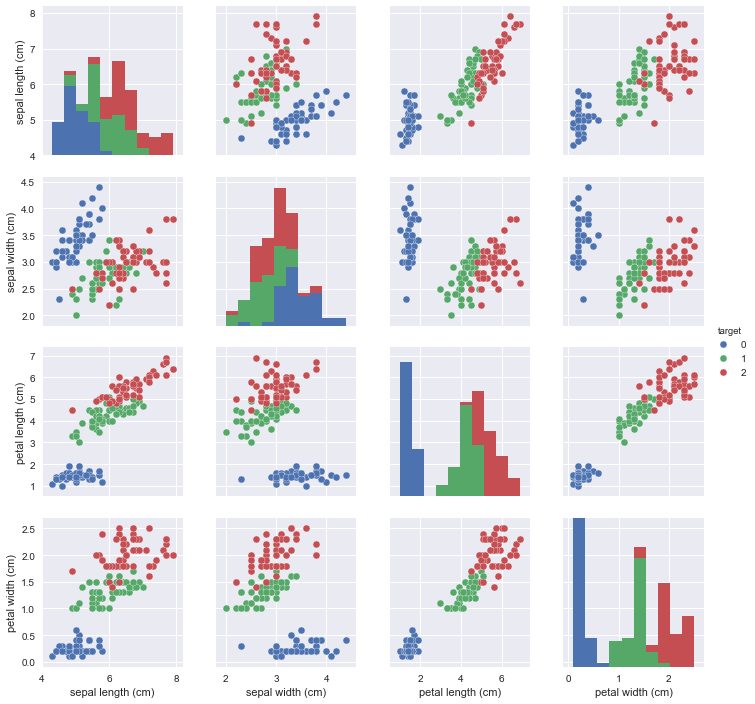

In [56]:
### Pairplot
g=sns.pairplot(df_iris,hue="target",vars=iris.feature_names)
plt.show()

### Model

In [61]:
## KMeans - fit model
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
## Get label
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [67]:
## Get Cluster Center
centroid=model.cluster_centers_
centroid

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [63]:
# predict the first 
model.predict(X[:3,])

array([1, 1, 1])

### Cluster visualization

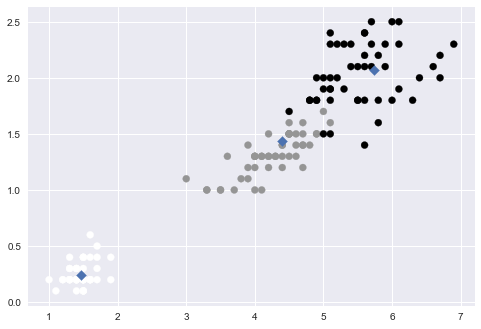

In [71]:
# Plot centroid in 2D plot
plt.scatter(X[:,2],X[:,3],c=y)
plt.scatter(centroid[:,2],centroid[:,3], marker='D',s=50)
plt.show()

### Evaluating

In [73]:
# Inertia - Sum of squared distances of samples to their closest cluster center
model.inertia_

78.940841426146022

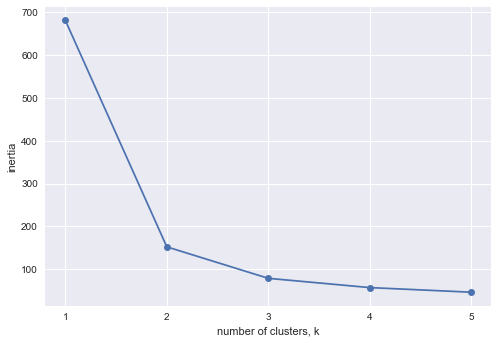

In [74]:
### Select the best k
ks = range(1,6)
inertias=[]
for k in ks:
    model_tmp=KMeans(n_clusters=k).fit(X)
    inertias.append(model_tmp.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [75]:
eval_label= pd.DataFrame({'label': model.labels_, 'target': y})

In [79]:
pd.crosstab(eval_label['label'],eval_label['target'])

target,0,1,2
label,,,
0,0,48,14
1,50,0,0
2,0,2,36


### Transforming features


### Scaling

In [85]:
# In clustering feature with different variance is a problem.
# If a feature has a variance that is orders of magnitude larger that others,
# it might dominate the objective function and make the
# estimator unable to learn from other features correctly as expected.
from numpy import var
pd.DataFrame({'feature': iris.feature_names,
              'variance': var(X,ddof=1,axis=0)})

,feature,variance
0,sepal length (cm),0.685694
1,sepal width (cm),0.188004
2,petal length (cm),3.113179
3,petal width (cm),0.582414


In [101]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(X)
labels=pipeline.predict(X)

In [90]:
eval_df = pd.DataFrame({'labels': labels, 'target': iris.target})

In [92]:
pd.crosstab(eval_df['labels'],eval_df['target'])

target,0,1,2
labels,,,
0,0,12,36
1,50,0,0
2,0,38,14


In [102]:
kmeans.inertia_

140.96581663074699

### Normalizer

In [108]:
#Normalize samples individually to unit norm.
#Each sample (i.e. each row of the data matrix) with at least one non zero
#component is rescaled independently of other samples so that its norm (l1 or l2) equals one.
normalizer = Normalizer()
kmeans = KMeans(n_clusters=3,init='k-means++')
pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(X)
labels=pipeline.predict(X)
eval_df = pd.DataFrame({'labels': labels, 'target': iris.target})
pd.crosstab(eval_df['labels'],eval_df['target'])

target,0,1,2
labels,,,
0,0,5,50
1,50,0,0
2,0,45,0


In [109]:
kmeans.inertia_

0.32320764544347275